In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

In [6]:
train_dataset = torchvision.datasets.MNIST(root='drive/MyDrive/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='drive/MyDrive/data', train=False, download=True, transform=transform)

In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
train_loader.__iter__().__next__()[0].shape

torch.Size([64, 1, 28, 28])

# USING CONVOLUTIONAL NETWORK

In [8]:
modelc = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(32, 64, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

In [14]:
#trainig with cnn
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelc.parameters(), lr=0.001)
epochs = 5
losses = []

In [15]:
for i in range(epochs):
  for x,y in train_loader:
    x,y = x.to(device),y.to(device)
    optimizer.zero_grad()
    pred = modelc(x)
    l = loss(pred,y)
    l.backward()
    optimizer.step()


  print(f"loss epoch {i}  ==  {l}")
  losses.append(l)

loss epoch 0  ==  0.0014985325979068875
loss epoch 1  ==  2.2388308025256265e-06
loss epoch 2  ==  3.7625292748089123e-07
loss epoch 3  ==  7.484825619030744e-05
loss epoch 4  ==  6.481944865299738e-07


In [21]:
losses = [i.item() for i in losses]

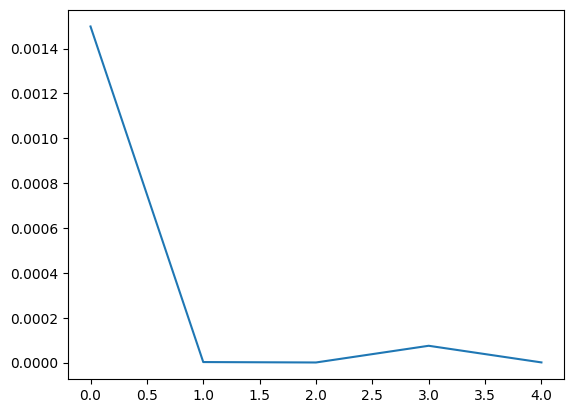

In [22]:
plt.plot(losses)

In [40]:
modelc.eval()
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        pred = modelc(imgs)
        predicted = pred.argmax(1)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print("Accuracy:", correct / total)

Accuracy: 0.9912


# USING MLP

In [52]:
modell = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 10)
).to(device)


In [53]:
losses = []

In [54]:
for i in range(epochs):
  for x,y in train_loader:
    x,y = x.to(device),y.to(device)
    optimizer.zero_grad()
    pred = modell(x)
    l = loss(pred,y)
    l.backward()
    optimizer.step()


  print(f"loss epoch {i}  ==  {l}")
  losses.append(l)

loss epoch 0  ==  2.3278541564941406
loss epoch 1  ==  2.298048973083496
loss epoch 2  ==  2.3226613998413086
loss epoch 3  ==  2.347926616668701
loss epoch 4  ==  2.281783103942871


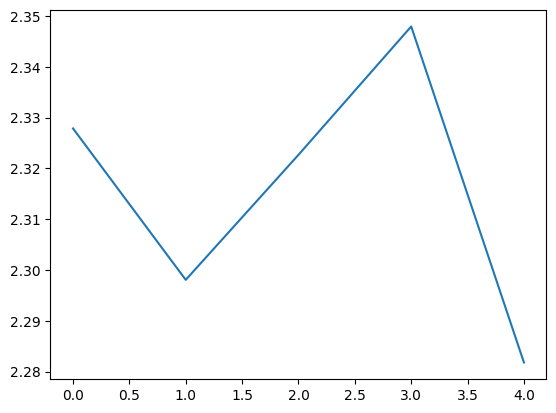

In [55]:
plt.plot([i.item() for i in losses])

In [56]:
modell.eval()
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        pred = modell(imgs)
        predicted = pred.argmax(1)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print("Accuracy:", correct / total)

Accuracy: 0.0833
